# Constants

In [21]:
import matplotlib

cmap = matplotlib.cm.viridis

# Segmented spine and tokens

##### Imports

In [22]:
import cv2
import io
import sys

sys.path.append('..')
import main

sys.path.append('../models')
import book_functions
import image_processing

import matplotlib.pyplot as plt
%matplotlib inline


# Google cloud
from google.cloud import vision
from google.cloud.vision import types

##### Get data

In [23]:
img_path = main.SHELFY_BASE_PATH + '/data/shelves/insight_8/insight_8.jpg'

# Instantiates a google vision API client
client = vision.ImageAnnotatorClient()

# Loads the image into memory
with io.open(img_path, 'rb') as img_file:
    content = img_file.read()
img_bin = types.Image(content=content)

img = cv2.imread(img_path)[:,:,::-1]




# Query the image on google cloud vision API, get words
response = client.document_text_detection(image=img_bin)
texts = response.text_annotations
words = [book_functions.Word.from_google_text(text) for text in texts]


# Get image lines
lines = image_processing.get_book_lines(img)

/home/prestonh/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


##### Make plot

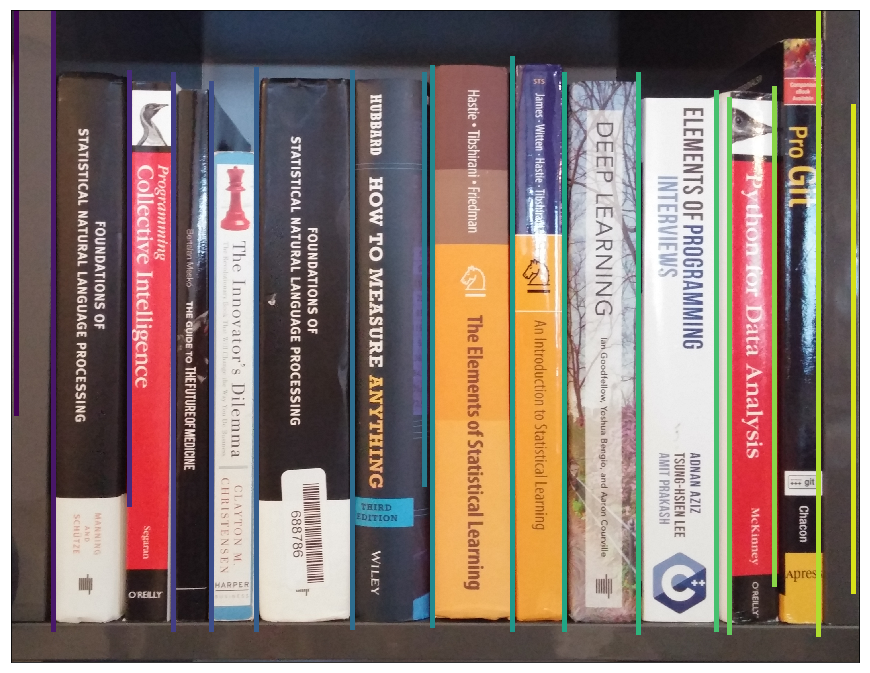

In [24]:
# Initialize figure
fig = plt.figure(figsize = (16,12))


# Plot image
plt.imshow(img)

# Plot annotations

# Plot word lines
for book in books:
    

# Plot spine lines
for i, line in enumerate(lines):
    plt.plot([line.x(line.min_y), line.x(line.max_y)], [line.min_y, line.max_y], lw = 5, color = cmap(i/len(lines)))


# Cosmetics
plt.xticks([])
plt.yticks([])

#plt.savefig('output/annotated_segmented.png', dpi = 300)

plt.show()